In [1]:
import torch
import nibabel as nib
from project.dataset import Dataset, VALDODataset
from project.preprocessing import z_score_normalization, min_max_normalization
from project.utils import plot_mri_slice

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations


In [2]:
ds = Dataset()

In [3]:
masks = ds.load_cmb_masks()
raw_cases = ds.load_raw_mri()
skullstripped_cases = ds.load_skullstripped_mri()

### Plot the middle slice of each given dataset


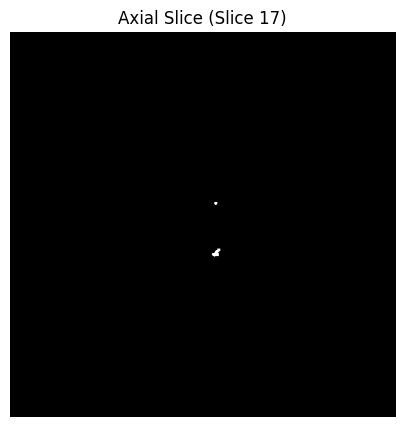

In [4]:
plot_mri_slice(masks[0], get_middle_slice=True)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


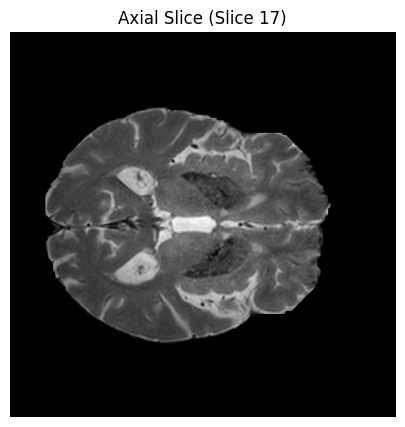

In [5]:
plot_mri_slice(raw_cases[0], get_middle_slice=True)

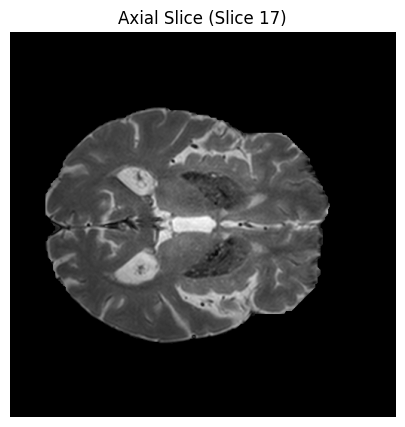

In [6]:
plot_mri_slice(skullstripped_cases[0], get_middle_slice=True)

### Load the image to numpy array and tensor


In [7]:
mask_data = nib.load(masks[0]).get_fdata()
raw_mri_data = nib.load(raw_cases[0]).get_fdata()
skullstripped_mri_data = nib.load(skullstripped_cases[0]).get_fdata()

print(f'CMB Mask data shape: {mask_data.shape}')
print(f'Raw MRI data shape: {raw_mri_data.shape}')
print(f'Skull-stripped MRI data shape: {skullstripped_mri_data.shape}')

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


CMB Mask data shape: (512, 512, 35)
Raw MRI data shape: (512, 512, 35)
Skull-stripped MRI data shape: (512, 512, 35)


In [8]:
mask_tensor = torch.tensor(mask_data, dtype=torch.float32)
raw_mri_tensor = torch.tensor(raw_mri_data, dtype=torch.float32)
skullstripped_mri_tensor = torch.tensor(skullstripped_mri_data, dtype=torch.float32)

print(f'CMB Mask tensor shape: {mask_tensor.shape}')
print(f'Raw MRI data shape: {raw_mri_tensor.shape}')
print(f'Skull-stripped MRI data shape: {skullstripped_mri_tensor.shape}')

CMB Mask tensor shape: torch.Size([512, 512, 35])
Raw MRI data shape: torch.Size([512, 512, 35])
Skull-stripped MRI data shape: torch.Size([512, 512, 35])


### Check the matrix of the center portion of the middle slices


`Get the middle slice of each given data`


In [9]:
def get_middle_slice(data):
    middle_idx = data.shape[2] // 2 
    return data[:, :, middle_idx]

In [10]:
middle_mask = get_middle_slice(mask_data)
middle_raw_mri = get_middle_slice(raw_mri_data)
middle_skullstripped_mri = get_middle_slice(skullstripped_mri_data)

`Locate the center portion of the data`

This is necessary since the brains are located in the center of the image slice


In [11]:
def get_center_portion(slice_data, size):
    center_x = slice_data.shape[0] // 2
    center_y = slice_data.shape[1] // 2
    half_size = size // 2
    return slice_data[center_x-half_size:center_x+half_size+1, center_y-half_size:center_y+half_size+1]

In [12]:
center_mask = get_center_portion(middle_mask, size=5)
center_raw_mri = get_center_portion(middle_raw_mri, size=5)
center_skullstripped_mri = get_center_portion(middle_skullstripped_mri, size=5)

center_mask_tensor = torch.tensor(center_mask, dtype=torch.float32)
center_raw_mri_tensor = torch.tensor(center_raw_mri, dtype=torch.float32)
center_skullstripped_mri_tensor = torch.tensor(center_skullstripped_mri, dtype=torch.float32)

In [13]:
print("CMB Mask Center Portion:")
print(center_mask_tensor)

CMB Mask Center Portion:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [14]:
print("Raw MRI Center Portion:")
print(center_raw_mri_tensor)

Raw MRI Center Portion:
tensor([[785.6919, 782.6228, 779.5537, 776.4846, 781.0881],
        [776.4846, 767.2771, 761.1389, 762.6736, 771.8809],
        [773.4153, 762.6736, 759.6045, 767.2771, 779.5537],
        [768.8118, 764.2080, 768.8118, 784.1572, 796.4336],
        [756.5354, 761.1389, 774.9500, 790.2954, 801.0374]])


In [15]:
print("Skull-stripped MRI Center Portion:")
print(center_skullstripped_mri_tensor)

Skull-stripped MRI Center Portion:
tensor([[785.6919, 782.6228, 779.5537, 776.4846, 781.0881],
        [776.4846, 767.2771, 761.1389, 762.6736, 771.8809],
        [773.4153, 762.6736, 759.6045, 767.2771, 779.5537],
        [768.8118, 764.2080, 768.8118, 784.1572, 796.4336],
        [756.5354, 761.1389, 774.9500, 790.2954, 801.0374]])


### Apply normalization


`Z-score Normalization`


In [16]:
z_score_mask = z_score_normalization(center_mask)
z_score_raw_mri = z_score_normalization(center_raw_mri)
z_score_skullstripped_mri = z_score_normalization(center_skullstripped_mri)

z_score_mask_tensor = torch.tensor(z_score_mask, dtype=torch.float32)
z_score_raw_mri_tensor = torch.tensor(z_score_raw_mri, dtype=torch.float32)
z_score_skullstripped_mri_tensor = torch.tensor(z_score_skullstripped_mri, dtype=torch.float32)

In [17]:
print("Z-score Normalized CMB Mask:")
print(z_score_mask_tensor)

Z-score Normalized CMB Mask:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [18]:
print("Z-score Normalized Raw MRI:")
print(z_score_raw_mri_tensor)

Z-score Normalized Raw MRI:
tensor([[ 1.0070,  0.7392,  0.4714,  0.2035,  0.6053],
        [ 0.2035, -0.5999, -1.1355, -1.0016, -0.1982],
        [-0.0643, -1.0016, -1.2694, -0.5999,  0.4714],
        [-0.4660, -0.8677, -0.4660,  0.8731,  1.9443],
        [-1.5372, -1.1355,  0.0696,  1.4087,  2.3460]])


In [19]:
print("Z-score Normalized Skull-stripped MRI:")
print(z_score_skullstripped_mri_tensor)

Z-score Normalized Skull-stripped MRI:
tensor([[ 1.0070,  0.7392,  0.4714,  0.2035,  0.6053],
        [ 0.2035, -0.5999, -1.1355, -1.0016, -0.1982],
        [-0.0643, -1.0016, -1.2694, -0.5999,  0.4714],
        [-0.4660, -0.8677, -0.4660,  0.8731,  1.9443],
        [-1.5372, -1.1355,  0.0696,  1.4087,  2.3460]])


`Min-max Normalization`


In [20]:
min_max_mask = min_max_normalization(center_mask)
min_max_raw_mri = min_max_normalization(center_raw_mri)
min_max_skullstripped_mri = min_max_normalization(center_skullstripped_mri)

min_max_mask_tensor = torch.tensor(min_max_mask, dtype=torch.float32)
min_max_raw_mri_tensor = torch.tensor(min_max_raw_mri, dtype=torch.float32)
min_max_skullstripped_mri_tensor = torch.tensor(min_max_skullstripped_mri, dtype=torch.float32)

In [21]:
print("Min-Max Normalized CMB Mask:")
print(min_max_mask_tensor)

Min-Max Normalized CMB Mask:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [22]:
print("Min-Max Normalized Raw MRI:")
print(min_max_raw_mri_tensor)

Min-Max Normalized Raw MRI:
tensor([[0.6552, 0.5862, 0.5172, 0.4483, 0.5517],
        [0.4483, 0.2414, 0.1034, 0.1379, 0.3448],
        [0.3793, 0.1379, 0.0690, 0.2414, 0.5172],
        [0.2759, 0.1724, 0.2759, 0.6207, 0.8965],
        [0.0000, 0.1034, 0.4138, 0.7586, 1.0000]])


In [23]:
print("Min-Max Normalized Skull-stripped MRI:")
print(min_max_skullstripped_mri_tensor)

Min-Max Normalized Skull-stripped MRI:
tensor([[0.6552, 0.5862, 0.5172, 0.4483, 0.5517],
        [0.4483, 0.2414, 0.1034, 0.1379, 0.3448],
        [0.3793, 0.1379, 0.0690, 0.2414, 0.5172],
        [0.2759, 0.1724, 0.2759, 0.6207, 0.8965],
        [0.0000, 0.1034, 0.4138, 0.7586, 1.0000]])
